Тут находится краткое описание (в разработке)

In [1]:
#Импортируем все библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import Pool, CatBoostRegressor
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Загрузим файлы
main = pd.read_csv('C:/HW_train_main_data.csv')
add = pd.read_csv('C:/HW_train_additional_data.csv')

In [3]:
# Напишем функцию для прочтений информации в датасетах
def inform(data):
    return display(data.head()), data.info()

In [4]:
# Датасет основной
inform(main)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29000 non-null  int64  
 1   timestamp            29000 non-null  object 
 2   full_sq              29000 non-null  int64  
 3   life_sq              22935 non-null  float64
 4   floor                28843 non-null  float64
 5   max_floor            19887 non-null  float64
 6   material             19887 non-null  float64
 7   build_year           16059 non-null  float64
 8   num_room             19887 non-null  float64
 9   kitch_sq             19887 non-null  float64
 10  apartment condition  16088 non-null  float64
 11  sub_area             29000 non-null  int64  
 12  price                29000 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 2.9+ MB


(None, None)

In [5]:
# Датасет основной
inform(add)

,id,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,30392,155572,0.000070,5,5,240.0,1,0,7,3,0,16,1,2.86,0.00,0,0,0,0
1,36540,111874,0.089040,5,5,NaN,0,0,10,3,0,11,5,9.26,2.71,1,0,0,0
2,94669,129207,0.007720,6,6,NaN,0,0,4,2,0,4,2,13.80,0.00,4,0,0,0
3,17531,125354,0.265089,4,5,1937.0,3,0,6,4,0,2,0,7.46,0.00,1,0,0,0
4,32159,111023,0.025609,7,7,240.0,3,0,6,4,0,1,0,0.00,0.00,3,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               29000 non-null  int64  
 1   population                       29000 non-null  int64  
 2   indust_part                      29000 non-null  float64
 3   preschool_facilities             29000 non-null  int64  
 4   school_facilities                29000 non-null  int64  
 5   hospital_beds_raion              15253 non-null  float64
 6   healthcare_facilities            29000 non-null  int64  
 7   university_num                   29000 non-null  int64  
 8   sport_objects_facilities         29000 non-null  int64  
 9   additional_education_facilities  29000 non-null  int64  
 10  culture_objects_facilities       29000 non-null  int64  
 11  shopping_centers_facilities      29000 non-null  int64  
 12  office_num        

(None, None)

- Успешно загрузили, прочитали и вывели информацию по квартирам

- Имеем пропуски

- Необходимо скорректировать некоторые типы данных 

In [6]:
# Прежде чем приступить к обработке датасета, предлагаю объединить два датасета в один
full = main.merge(add, on='id', how='left')
display(full.head())
full.info()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,...,3,0,16,1,2.86,0.00,0,0,0,0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,...,3,0,11,5,9.26,2.71,1,0,0,0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,...,2,0,4,2,13.80,0.00,4,0,0,0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,...,4,0,2,0,7.46,0.00,1,0,0,0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,...,4,0,1,0,0.00,0.00,3,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29000 entries, 0 to 28999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               29000 non-null  int64  
 1   timestamp                        29000 non-null  object 
 2   full_sq                          29000 non-null  int64  
 3   life_sq                          22935 non-null  float64
 4   floor                            28843 non-null  float64
 5   max_floor                        19887 non-null  float64
 6   material                         19887 non-null  float64
 7   build_year                       16059 non-null  float64
 8   num_room                         19887 non-null  float64
 9   kitch_sq                         19887 non-null  float64
 10  apartment condition              16088 non-null  float64
 11  sub_area                         29000 non-null  int64  
 12  price             

Посмотрим распределение на всех числовых данных нашей таблицы

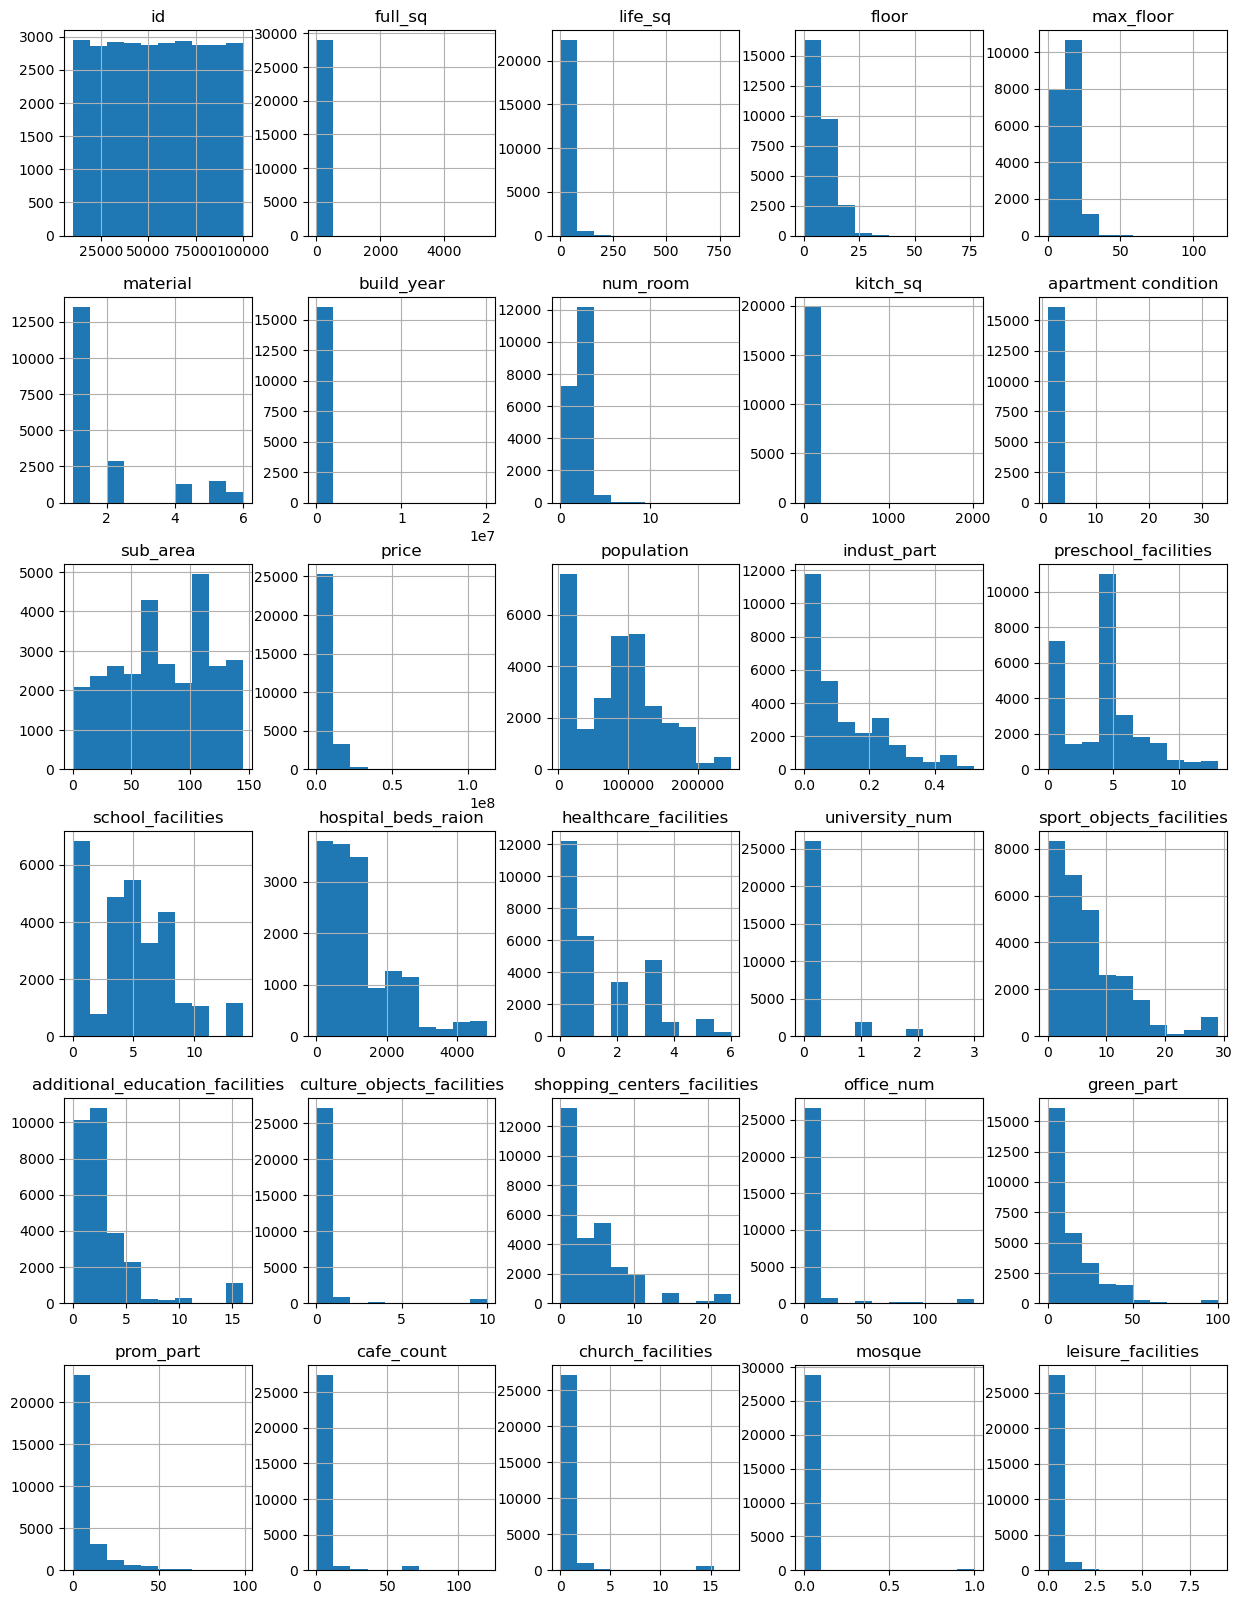

In [7]:
full.hist(figsize=(15, 20));

## Предобработка данных

In [8]:
# Посмотрим на количество пропусков
full.isna().sum()

id                                     0
timestamp                              0
full_sq                                0
life_sq                             6065
floor                                157
max_floor                           9113
material                            9113
build_year                         12941
num_room                            9113
kitch_sq                            9113
apartment condition                12912
sub_area                               0
price                                  0
population                             0
indust_part                            0
preschool_facilities                   0
school_facilities                      0
hospital_beds_raion                13747
healthcare_facilities                  0
university_num                         0
sport_objects_facilities               0
additional_education_facilities        0
culture_objects_facilities             0
shopping_centers_facilities            0
office_num      

In [9]:
a = full.query('full_sq > 0')['full_sq'].count()
a

28998

In [10]:
a/full.shape[0]

0.9999310344827587

In [11]:
full = full.query('full_sq > 0')
full = full.query('life_sq < full_sq')

Постараемся заполнить пропуски, там где это возможно. 

count    21844.000000
mean         0.602497
std          0.165660
min          0.000000
25%          0.517857
50%          0.581395
75%          0.644444
max          0.996933
dtype: float64

<AxesSubplot:>

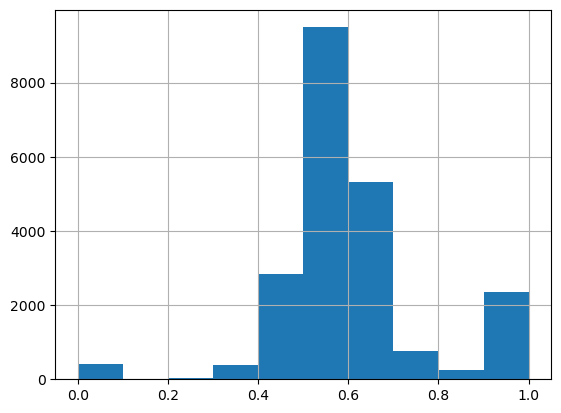

In [12]:
display((full['life_sq']/full['full_sq']).describe())
(full['life_sq']/full['full_sq']).hist(bins=10, range=(0,1))


In [13]:
(full.query('life_sq >= full_sq').shape[0])/full.shape[0]*100

0.0

In [14]:
mean_full_sq = (full['life_sq']/full['full_sq']).mean()
mean_full_sq

0.6024973217573364

### Начнем со столбца life_sq

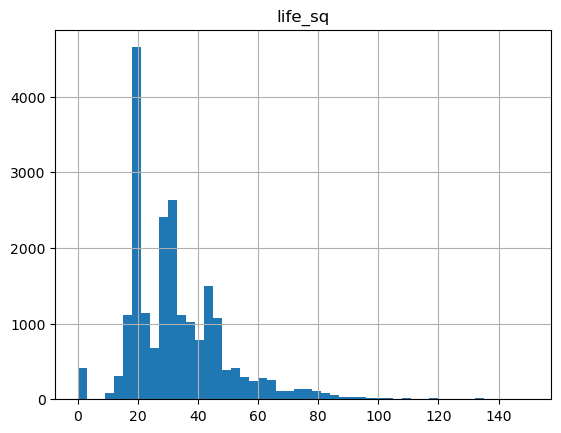

In [15]:
full.hist(column = 'life_sq', bins=50, range=(0,150));

In [17]:
# ЗАменим пропуска на медианное значение, оно более устойчиво к выбросам
full['life_sq'] = full['life_sq'].fillna(full['full_sq']*mean_full_sq)
# Проверка
full['life_sq'].isna().sum()

0

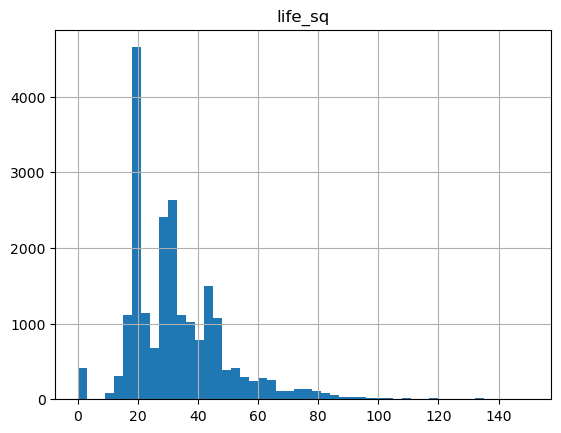

In [18]:
full.hist(column = 'life_sq', bins=50, range=(0,150));

Квартиры с околонулевой живой площадью скорее всего аномалии, поэтому также заменим их на медианное значение

In [19]:
full.loc[(full['life_sq'] < 5), 'life_sq'] = full.loc[(full['life_sq'] < 5), 'full_sq'] * mean_full_sq

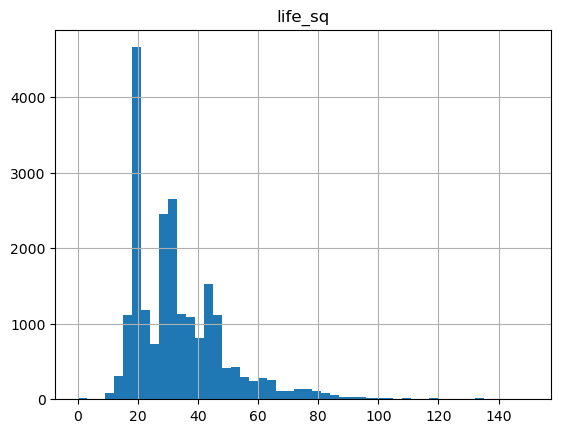

In [20]:
full.hist(column = 'life_sq', bins=50, range=(0,150));

### Столбец floor

In [ ]:
# Процент пропуска от общего числа
full['floor'].isna().sum() / full.shape[0] * 100

In [ ]:
# Процент пропусков мал, поэтому удалим его
full = full.dropna(subset=['floor'])
# Проверим
full['floor'].isna().sum()

### Столбец max_floor

In [ ]:
# ЗАменим пропуска на медианное значение, оно более устойчиво к выбросам
full['max_floor'] = round(full['max_floor'].fillna(full['max_floor'].median()))
# Проверка
full['max_floor'].isna().sum()

Возможна такая ситуация, когда floor будет больше, чем max_floor, избавимся же от таких случаев.

<br/>
<div class="alert alert-block alert-danger">
<h2> Нужна доработка, пробовал пару вариантов, не додумался как скорректировал <a class="tocSkip"></h2>

### Столбец material

In [ ]:
# ЗАменим пропуска на медианное значение, оно более устойчиво к выбросам
full['material'] = round(full['material'].fillna(full['material'].median()))
# Проверка
full['material'].isna().sum()

### Столбец build_year

In [ ]:
full.hist(column = 'build_year', bins=50, range=(0,4000));

In [ ]:
full.hist(column = 'build_year', bins=50, range=(1750,2100));

In [ ]:
# ЗАменим пропуска на медианное значение, оно более устойчиво к выбросам
full['build_year'] = full['build_year'].fillna(full['build_year'].median())
# Проверка
full['build_year'].isna().sum()

Квартиры с околонулевым годом постройки скорее всего аномалии, поэтому также заменим их на медианное значение

In [ ]:
full.loc[(full['build_year'] < 100), 'build_year'] = full['build_year'].median()

### Столбец num_room

In [ ]:
full.hist(column = 'num_room', bins=10, range=(0,10));

In [ ]:
# ЗАменим пропуска на медианное значение, можно и на среднее, значения плотно сконцентрированы, выбросов нет. 
full['num_room'] = round(full['num_room'].fillna(full['num_room'].median()))
# Проверка
full['num_room'].isna().sum()

### Столбец kitch_sq

In [ ]:
full.hist(column = 'kitch_sq', bins=25, range=(0,25));

In [ ]:
# ЗАменим пропуска на медианное значение, оно более устойчиво к выбросам
full['kitch_sq'] = full['kitch_sq'].fillna(full['kitch_sq'].median())
# Проверка
full['kitch_sq'].isna().sum()

Кухни менее или равные 2 квадратам кажутся маловероятными, возможно, есть ошибка в данных, заменим их также на медианное значение

In [ ]:
full.loc[(full['kitch_sq'] <= 2), 'kitch_sq'] = full['kitch_sq'].median()

In [ ]:
extra_area = full.query('(life_sq + kitch_sq) > full_sq')
extra_area.shape[0]

<br/>
<div class="alert alert-block alert-danger">
<h2> Непонятно, что делать с этой аномалью дальше, либо удалять, либо как-то заменять <a class="tocSkip"></h2>

### Столбец apartment condition

In [ ]:
# Переименуем столбец
full = full.rename(columns={'apartment condition': 'apartment_condition'})

In [ ]:
full.hist(column = 'apartment_condition', bins=5, range=(0,5));

In [ ]:
# ЗАменим пропуска на медианное значение, можно и на среднее, значения плотно сконцентрированы, выбросов нет. 
full['apartment_condition'] = round(full['apartment_condition'].fillna(full['apartment_condition'].median()))
# Проверка
full['apartment_condition'].isna().sum()

### Столбец hospital_beds_raion

In [ ]:
# ЗАменим пропуска на медианное значение, можно и на среднее, значения плотно сконцентрированы, выбросов нет. 
full['hospital_beds_raion'] = round(full['hospital_beds_raion'].fillna(full['hospital_beds_raion'].median()))
# Проверка
full['hospital_beds_raion'].isna().sum()

In [ ]:
# ПРоверим
inform(full)

Привдем столбцы в нужные форматы

In [ ]:
full['timestamp'] = pd.to_datetime(full['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
full['full_sq'] = full['full_sq'].astype(float)

full['floor'] = full['floor'].astype(int)

full['max_floor'] = full['max_floor'].astype(int)

full['material'] = full['material'].astype(int)

full['build_year'] = full['build_year'].astype(int)

full['num_room'] = full['num_room'].astype(int)

full['apartment_condition'] = full['apartment_condition'].astype(int)

full['sub_area'] = full['sub_area'].astype(float)

In [ ]:
# Проверим на дубликаты
full.duplicated().sum()

Будем считать, что обработка данных завершена, приступим к анализу данных. 

## Исследовательский анализ

In [ ]:
# Добавим еще несколько признаков: цена за метр квадратный, год, месяц, день недели

full['meter_price'] = full['price']/full['full_sq']

full['year'] = pd.DatetimeIndex(full['timestamp']).year 

full['month'] = pd.DatetimeIndex(full['timestamp']).month 

full['day'] = full['timestamp'].dt.weekday

In [ ]:
# определим гистограмму для цены квартиры
full.hist(column='price', grid=True, bins=100, range=(0,70000000));
plt.title('Цена квартиры')
plt.xlabel("Цена")
plt.ylabel("Количество случаев");

Наблюдаем два пика: 1) Первый указывает на спрос на бюджетное жилье 2) В основном квартиры 6-7 миллиона условных единиц (т.к. не знаю истиной валюты)

In [ ]:
# Гостограмма по жилой площади
full.hist(column='life_sq', grid=True, bins=50, range=(0,180));
plt.title('Жилая площадь')
plt.xlabel("Метров")
plt.ylabel("Количество случаев");

График показывает, что люди также предпочитают более бюджетное жилье (примерно 20 метров жилой площади) и чуть больше 30 метров (средний класс внес свою лепту и замена пропусков)

In [ ]:
# Количество комнат
full.hist(column='num_room', grid=True, bins=10, range=(0,10));
plt.title('Комнаты')
plt.xlabel("Количество")
plt.ylabel("Количество случаев");

В основном преобладают 2х комнатные квартиры

In [ ]:
# По этажу
full.hist(column='floor', grid=True, bins=40, range=(0,40));
plt.title('Расположение на этаже')
plt.xlabel("Этаж")
plt.ylabel("Количество случаев");

Жители предпочитают низкие этажи, чем верхние. Связано может быть с низкой застройкой, так и с меньшей ценой в зависимости от этажа. Попробуем это подтвердить при следующем анализе. 

In [ ]:
# Посмотрим как меняется цена квартиры от количества метров
full.plot(x='full_sq', y='price', kind='scatter', xlim=(0, 250), ylim=(0, 20000000));
plt.title('Стоимость от площади')
plt.xlabel("Метров")
plt.ylabel("Цена");

НА графике замечена линейная зависимость - чем больше метров, тем больше цена квартиры

In [ ]:
# Посмотрим как меняется цена квартиры от количества метров жилой площади
full.plot(x='life_sq', y='price', kind='scatter', xlim=(0, 250), ylim=(0, 20000000));
plt.title('Стоимость от жилой площади')
plt.xlabel("Метров")
plt.ylabel("Цена");

На грфике видно, что чем больше цена, тем больше количество жилой площади, цена разнится очень сильно, хотя метраж изменяется медленнее

In [ ]:
# Посмотрим как меняется цена квартиры от количества метров жилой площади
full.plot(x='floor', y='price', kind='scatter', xlim=(0, 40), ylim=(0, 50000000));
plt.title('Стоимость от этажа')
plt.xlabel("Этаж")
plt.ylabel("Цена");

Наша теория предыдущая не подтвердилась, в основном дорогие варианты расположены на низких этажах

In [ ]:
# Посмотрим, как менялась цена из года в год
plot_year = full.pivot_table(index='year', values = 'price', aggfunc = 'median')
# Поскольку мы не знаем, что за даты указаны в данных, будем считать, что это даты объявления
plot_year.plot(style ='o-', ylim=(4000000, 9000000), grid = True, figsize = (18,6), legend=False);
plt.title('Стоимость от года')
plt.xlabel("Год")
plt.ylabel("Цена");

Видим, что из года в год цена квартир увеличивается

In [ ]:
# Посмотрим, как менялась цена за метр из года в год
plot_year_price = full.pivot_table(index='year', values = 'meter_price', aggfunc = 'median')
# Поскольку мы не знаем, что за даты указаны в данных, будем считать, что это даты объявления
plot_year_price.plot(style ='o-', ylim=(100000, 200000), grid = True, figsize = (18,6), legend=False);
plt.title('Стоимость от года')
plt.xlabel("Год")
plt.ylabel("Цена за метр");

По сравнению с 2011 годом видим, что цена за метр в 2013 году упала, но к 2015 году даже возросла. Возможзно обусловлено кризисом и низкой покупательской способностью. 

 - Исследовательский анализ завершен

In [ ]:
# Отбросим все ненужные нам столбцы
full = full.drop(['id', 'timestamp', 'year', 'month', 'day'], axis=1)
# Проверим
inform(full)

In [ ]:
columns = full.columns

In [ ]:
import phik
# Посмотрим матрицу корреляции признаков
full.phik_matrix(interval_cols=columns)

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(full.phik_matrix(interval_cols=columns), 
            annot = True, fmt='.0%', vmin=0, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title('Тепловая карта зависмостей')
plt.ylabel('Признаки')
plt.xlabel('Признаки');